In [1]:
import pandas as pd

# 데이터 로드 (파일 경로는 실제 환경에 맞게 수정해야 합니다)
train = pd.read_csv('../data/train.csv')

# 데이터 구조 확인
print(train.head())
print(train.columns)

     fname                                           dialogue  \
0  train_0  #Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...   
1  train_1  #Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...   
2  train_2  #Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...   
3  train_3  #Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...   
4  train_4  #Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...   

                                             summary     topic  
0  스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...   건강검진 받기  
1  파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...        백신  
2  #Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...     열쇠 찾기  
3  #Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...  여자친구가 있다  
4  말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...        댄스  
Index(['fname', 'dialogue', 'summary', 'topic'], dtype='object')


In [2]:
# 대화와 요약문 길이 분석
train_dialog_length = train['dialogue'].apply(len)
train_summary_length = train['summary'].apply(len)

print("대화 길이에 대한 정보")
dialogue_stats = train_dialog_length.describe()
print(dialogue_stats)
print("=================")
print("요약문 길이에 대한 정보")
summary_stats = train_summary_length.describe()
print(summary_stats)

대화 길이에 대한 정보
count    12457.000000
mean       438.765112
std        220.134710
min         99.000000
25%        299.000000
50%        396.000000
75%        540.000000
max       2546.000000
Name: dialogue, dtype: float64
요약문 길이에 대한 정보
count    12457.000000
mean        87.397929
std         37.641178
min         19.000000
25%         61.000000
50%         80.000000
75%        106.000000
max        478.000000
Name: summary, dtype: float64


In [3]:
# 'ㅋㅋ'가 포함된 데이터 확인
print(train[train['dialogue'].str.contains('ㅋㅋ', na=False)])

# 'ㅋㅋ'를 '웃기다'로 대체
train['dialogue'] = train['dialogue'].str.replace('ㅋㅋ', '웃기다')

# 대체 후 다시 확인
print(train[train['dialogue'].str.contains('ㅋㅋ', na=False)])

           fname                                           dialogue  \
3154  train_3154  #Person1#: 짐! 잘 지내? \n#Person2#: 찰리! 저게 너의 차야?...   
5429  train_5429  #Person1#: 너 남자친구 있어?\n#Person2#: 응, 전에 남자친구 있...   

                                                summary  topic  
3154  짐은 찰리의 차가 못생겼다고 생각하지만 찰리는 그저 좀 고쳐야 한다고 말한다. 그런...  \n자동차  
5429  #Person1#과 #Person2#는 각자의 전 연인에 대해 이야기하다가, #Pe...  사랑 고백  
Empty DataFrame
Columns: [fname, dialogue, summary, topic]
Index: []


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


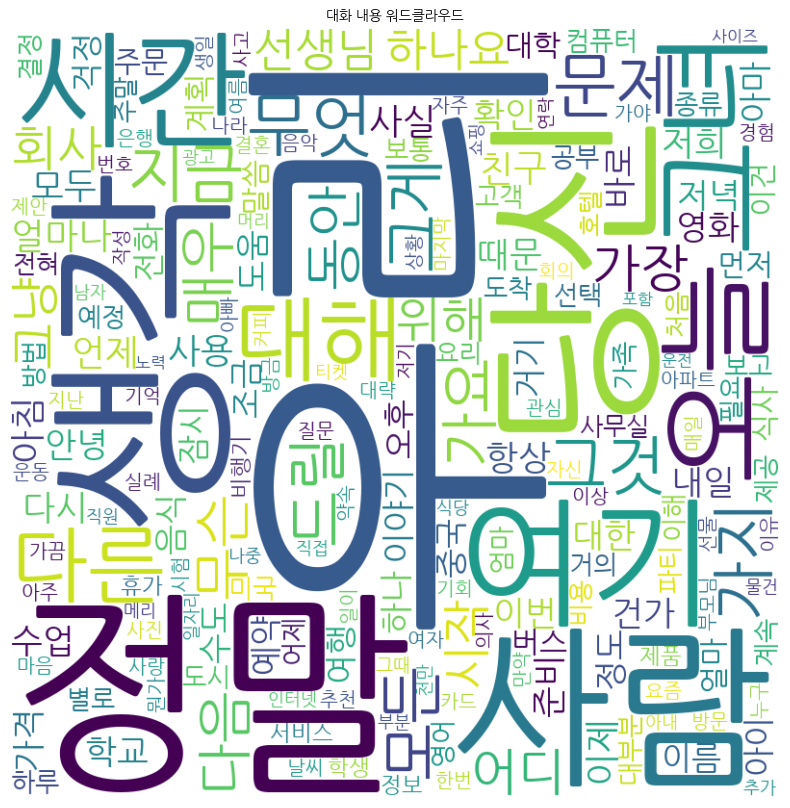

In [4]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정 
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# matplotlib에 한글 폰트 설정
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# 텍스트에서 명사만 추출하는 함수 정의
def get_nouns(text):
    okt = Okt()
    nouns = okt.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]


# 워드클라우드를 생성하는 함수 정의
def create_wordcloud(text, title):
    nouns = get_nouns(text)
    noun_counts = Counter(nouns)
    
    wc = WordCloud(font_path=font_path,  
                   background_color='white',
                   width=800, height=800)
    wc.generate_from_frequencies(noun_counts)
    
    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20, fontproperties=fontprop)  
    plt.show()

# 전체 대화에 대한 워드클라우드 생성
all_dialogues = ' '.join(train['dialogue'])
create_wordcloud(all_dialogues, '대화 내용 워드클라우드')

In [5]:
import re

def extract_masked_info(text):
    pattern = r"#\w+#"
    return set(re.findall(pattern, text))

def extract_person_tokens(text):
    pattern = r"#Person\d+#"
    return set(re.findall(pattern, text))

# 마스킹된 정보 추출
masked_info = train['dialogue'].apply(extract_masked_info)
print("마스킹된 정보 유형:", set.union(*masked_info))

# 대화 참여자 수 확인
person_tokens = train['dialogue'].apply(extract_person_tokens)
print("대화별 참여자 수:", person_tokens.apply(len).value_counts())

마스킹된 정보 유형: {'#DateOfBirth#', '#PhoneNumber#', '#PassportNumber#', '#Email#', '#Person4#', '#Person1#', '#CardNumber#', '#SSN#', '#CarNumber#', '#Person5#', '#Person3#', '#Address#', '#Person#', '#Person6#', '#Person2#', '#Person7#'}
대화별 참여자 수: dialogue
2    12332
3      111
4        9
5        3
6        1
7        1
Name: count, dtype: int64


In [6]:
from transformers import AutoTokenizer

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("gogamza/kobart-base-v2")

# 특별 토큰 추가
special_tokens = list(set.union(*masked_info))
special_tokens_dict = {'additional_special_tokens': special_tokens}
tokenizer.add_special_tokens(special_tokens_dict)

print("추가된 특별 토큰:", tokenizer.additional_special_tokens)
print("추가된 특별 토큰 ID:", tokenizer.additional_special_tokens_ids)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


추가된 특별 토큰: ['#Email#', '#Person5#', '#DateOfBirth#', '#SSN#', '#CarNumber#', '#Person#', '#PassportNumber#', '#Person2#', '#Address#', '#Person7#', '#Person1#', '#Person6#', '#CardNumber#', '#Person3#', '#PhoneNumber#', '#Person4#']
추가된 특별 토큰 ID: [30000, 30001, 30002, 30003, 30004, 30005, 30006, 30007, 30008, 30009, 30010, 30011, 30012, 30013, 30014, 30015]


## fine-Tunning Augmentation.
문장부호 관련 데이터 증강
train_no : no 수정 필요!

In [7]:
import pandas as pd
import random

# 데이터 로드 (파일 경로는 실제 환경에 맞게 수정해야 합니다)
train = pd.read_csv('../data/train.csv')

# 문장부호 리스트
punctuation_marks = [".", ";", "?", ":", "!", ","]

# 문장부호를 추가하는 증강 함수
def add_punctuation(text):
    words = text.split()
    new_words = []
    for word in words:
        # 각 단어 뒤에 문장부호를 추가할지 말지 랜덤하게 결정
        if random.random() < 0.3:  # 30% 확률로 문장부호 추가
            new_word = word + random.choice(punctuation_marks)
        else:
            new_word = word
        new_words.append(new_word)
    
    return " ".join(new_words)

# 데이터 증강 함수
def augment_data(row):
    # 원본 데이터를 그대로 반환 (첫 번째 증강 데이터)
    original_data = row.copy()

    # 문장부호 추가 (두 번째 증강 데이터)
    punctuated_dialogue = add_punctuation(row['dialogue'])
    punctuated_summary = add_punctuation(row['summary'])
    punctuated_data = row.copy()
    punctuated_data['dialogue'] = punctuated_dialogue
    punctuated_data['summary'] = punctuated_summary

    return [original_data, punctuated_data]

# 모든 행에 대해 증강 수행
augmented_data = []
for index, row in train.iterrows():
    augmented_samples = augment_data(row)
    augmented_data.extend(augmented_samples)

# 증강된 데이터프레임 생성
augmented_df = pd.DataFrame(augmented_data)

# 증강된 데이터 확인
print(augmented_df.head())

# 증강된 데이터 저장 (원하는 파일 경로에 저장)
#augmented_df.to_csv('../data/augmented_train.csv', index=False)

     fname                                           dialogue  \
0  train_0  #Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...   
0  train_0  #Person1#: 안녕하세요, 스미스씨. 저는 호킨스? 의사입니다. 오늘 왜 오셨...   
1  train_1  #Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...   
1  train_1  #Person1#: 안녕하세요,? 파커 부인, 어떻게 지내셨나요? #Person2#...   
2  train_2  #Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...   

                                             summary    topic  
0  스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...  건강검진 받기  
0  스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는; 것을 권장합...  건강검진 받기  
1  파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...       백신  
1  파커 부인이 리키를 데리고 백신 접종을? 하러: 갔다.: 피터스 박사는 기록을 확인...       백신  
2  #Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...    열쇠 찾기  
